# Data Cleaning

In [10]:
import pandas as pd

columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
cars = pd.read_table("auto-mpg.data", delim_whitespace=True, names=columns)

# Remove missing data from horsepower column
filtered_cars = cars[cars["horsepower"] != "?"]
filtered_cars["horsepower"] = filtered_cars["horsepower"].astype("float")

C:\Users\Arnaud\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Data Exploration

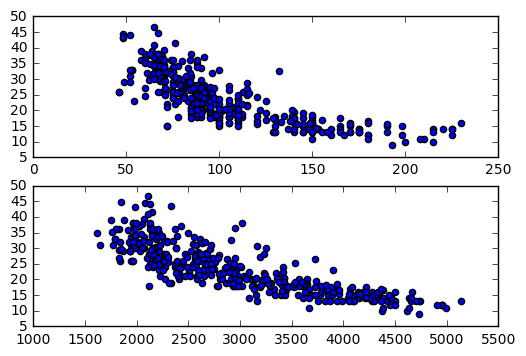

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.scatter(filtered_cars["horsepower"], filtered_cars["mpg"])
ax2.scatter(filtered_cars["weight"], filtered_cars["mpg"])

# Ou
#filtered_cars.plot('horsepower', 'mpg', kind='scatter', c='red')
#filtered_cars.plot('weight', 'mpg', kind='scatter', c='blue')

plt.show()

# Fitting a model

In [22]:
import sklearn
from sklearn.linear_model import LinearRegression

# Fit + Predict
lr = LinearRegression()
lr.fit(filtered_cars[["horsepower"]], filtered_cars["mpg"])
predictions = lr.predict(filtered_cars[["horsepower"]])

# True vs predicted
print(predictions[0:5])
print(filtered_cars["mpg"][0:5])

[ 19.41604569  13.89148002  16.25915102  16.25915102  17.83759835]
0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64


# Plotting the predictions

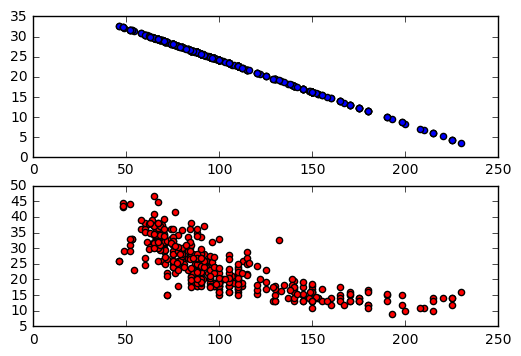

In [24]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.scatter(filtered_cars["horsepower"], predictions, c="blue")
ax2.scatter(filtered_cars["horsepower"], filtered_cars["mpg"], c="red")

plt.show()

# Error Metrics

In [26]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(filtered_cars["mpg"], predictions)
rmse = mse ** (1/2)

print(mse)
print(rmse)

8545.93424522
92.4442223464
